In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
df=pd.read_csv('cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

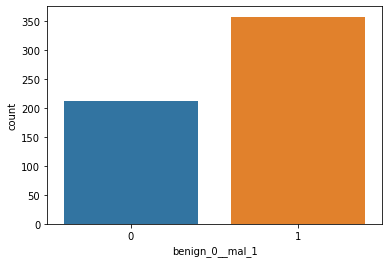

In [7]:
sns.countplot(x=df['benign_0__mal_1'])

In [8]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

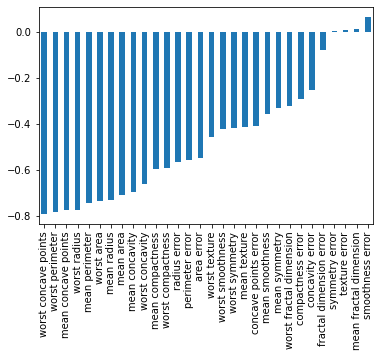

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

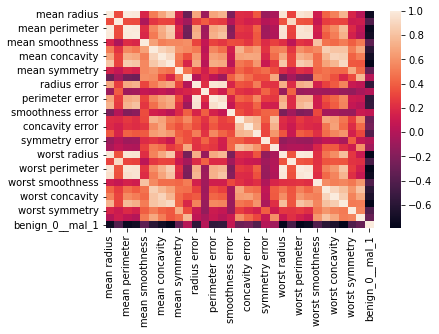

In [11]:
sns.heatmap(df.corr())

In [12]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler= MinMaxScaler()

In [17]:
X_train=scaler.fit_transform(X_train)

In [18]:
X_train.shape

(426, 30)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
X_test.shape

(143, 30)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [22]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# binary classification thats why we use sigmoid 
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [23]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 5s 46ms/step - loss: 0.6746 - val_loss: 0.6482
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6183 - val_loss: 0.6056
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5779 - val_loss: 0.5596
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5321 - val_loss: 0.5067
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4797 - val_loss: 0.4534
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4293 - val_loss: 0.4011
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3807 - val_loss: 0.3533
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3413 - val_loss: 0.3126
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3051 - val_loss: 0.2779
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2805 - val_loss: 0.2510
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0501 - val_loss: 0.1138
Epoch 84/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0515 - val_loss: 0.1120
Epoch 85/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0494 - val_loss: 0.1139
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0495 - val_loss: 0.1124
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0488 - val_loss: 0.1203
Epoch 88/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0495 - val_loss: 0.1135
Epoch 89/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0499 - val_loss: 0.1140
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0511 - val_loss: 0.1109
Epoch 91/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0516 - val_loss: 0.1161
Epoch 92/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0516 - val_loss: 0.11

14/14 [==============================] - 0s 6ms/step - loss: 0.0332 - val_loss: 0.1218
Epoch 165/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0335 - val_loss: 0.1325
Epoch 166/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0350 - val_loss: 0.1149
Epoch 167/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.1447
Epoch 168/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0364 - val_loss: 0.1193
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0314 - val_loss: 0.1325
Epoch 170/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0363 - val_loss: 0.1171
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0329 - val_loss: 0.1322
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0319 - val_loss: 0.1167
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0338 - val_loss: 0.1293
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0233 - val_loss: 0.1277
Epoch 246/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0231 - val_loss: 0.1296
Epoch 247/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0225 - val_loss: 0.1249
Epoch 248/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0232 - val_loss: 0.1286
Epoch 249/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0226 - val_loss: 0.1269
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: 0.1339
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0225 - val_loss: 0.1265
Epoch 252/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0221 - val_loss: 0.1280
Epoch 253/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0217 - val_loss: 0.1338
Epoch 254/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0222 - val_loss: 0.1282
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0181 - val_loss: 0.1213
Epoch 327/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0177 - val_loss: 0.1297
Epoch 328/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss: 0.1400
Epoch 329/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0183 - val_loss: 0.1302
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.1386
Epoch 331/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.1274
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0174 - val_loss: 0.1284
Epoch 333/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0159 - val_loss: 0.1266
Epoch 334/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.1303
Epoch 335/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0181 - val_loss: 0.1354
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.0126 - val_loss: 0.1554
Epoch 408/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0122 - val_loss: 0.1515
Epoch 409/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0137 - val_loss: 0.1486
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.1326
Epoch 411/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0103 - val_loss: 0.1672
Epoch 412/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0143 - val_loss: 0.1355
Epoch 413/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0125 - val_loss: 0.1504
Epoch 414/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0100 - val_loss: 0.1375
Epoch 415/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0120 - val_loss: 0.1392
Epoch 416/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0113 - val_loss: 0.1491
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0099 - val_loss: 0.1497
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.1592
Epoch 490/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.1580
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.1561
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.1678
Epoch 493/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.1539
Epoch 494/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.1756
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0077 - val_loss: 0.1561
Epoch 496/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.1643
Epoch 497/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0190 - val_loss: 0.1461
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.1698
Epoch 570/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.1831
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.1660
Epoch 572/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0065 - val_loss: 0.1754
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.1816
Epoch 574/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.1699
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.1858
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.1755
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.2020
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.1630
Epoc

In [24]:
model.history.history

{'loss': [0.6746000051498413,
  0.6183491945266724,
  0.5778570771217346,
  0.5320682525634766,
  0.479726642370224,
  0.429282009601593,
  0.3806893825531006,
  0.3413197696208954,
  0.30513155460357666,
  0.2805196940898895,
  0.25647884607315063,
  0.23627425730228424,
  0.22155675292015076,
  0.210251584649086,
  0.19874928891658783,
  0.18796370923519135,
  0.17558921873569489,
  0.17116333544254303,
  0.1618250608444214,
  0.15219518542289734,
  0.14941035211086273,
  0.14147618412971497,
  0.13475388288497925,
  0.13294631242752075,
  0.12723833322525024,
  0.11875370144844055,
  0.11830037832260132,
  0.11167646199464798,
  0.1082644909620285,
  0.10588778555393219,
  0.10375768691301346,
  0.09759187698364258,
  0.094936802983284,
  0.09284521639347076,
  0.09389926493167877,
  0.08909224718809128,
  0.0849984735250473,
  0.08481073379516602,
  0.08198960870504379,
  0.08323469758033752,
  0.07867439836263657,
  0.07882197201251984,
  0.07818511873483658,
  0.0746031403541565,

In [25]:
losses=pd.DataFrame(model.history.history)

In [26]:
losses

,loss,val_loss
0,0.674600,0.648242
1,0.618349,0.605612
2,0.577857,0.559636
3,0.532068,0.506740
4,0.479727,0.453361
...,...,...
595,0.005138,0.181365
596,0.004875,0.190652
597,0.004865,0.188308
598,0.005476,0.172261


<AxesSubplot:>

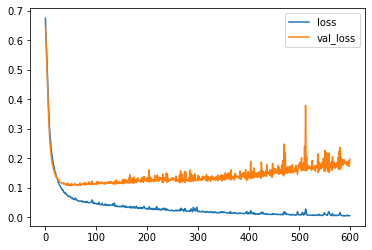

In [27]:
losses.plot()

In [28]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# binary classification thats why we use sigmoid 
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [31]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [32]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 26ms/step - loss: 0.7048 - val_loss: 0.6820
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6716 - val_loss: 0.6538
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6403 - val_loss: 0.6234
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5990 - val_loss: 0.5694
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5389 - val_loss: 0.5107
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4877 - val_loss: 0.4601
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4380 - val_loss: 0.4130
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3978 - val_loss: 0.3685
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3523 - val_loss: 0.3304
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3182 - val_loss: 0.2961
Epoch 11

In [33]:
model_loss=pd.DataFrame(model.history.history)

In [34]:
model_loss

,loss,val_loss
0,0.704776,0.682007
1,0.671566,0.653762
2,0.640295,0.623446
3,0.599035,0.569411
4,0.538890,0.510722
...,...,...
65,0.058894,0.111930
66,0.057163,0.118600
67,0.058699,0.119767
68,0.062404,0.125179


<AxesSubplot:>

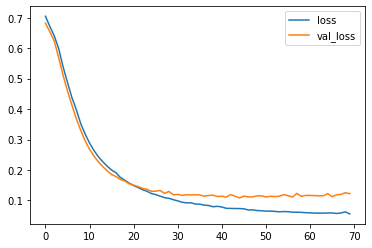

In [35]:
model_loss.plot()

In [36]:
from tensorflow.keras.layers import Dropout

In [37]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
# binary classification thats why we use sigmoid 
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 38ms/step - loss: 0.7164 - val_loss: 0.6838
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6922 - val_loss: 0.6724
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6729 - val_loss: 0.6622
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6634 - val_loss: 0.6503
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6504 - val_loss: 0.6359
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6427 - val_loss: 0.6204
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6283 - val_loss: 0.6018
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5980 - val_loss: 0.5802
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5951 - val_loss: 0.5531
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5700 - val_loss: 0.5231
Epoch 11

14/14 [==============================] - 0s 10ms/step - loss: 0.1376 - val_loss: 0.0900
Epoch 83/600
14/14 [==============================] - 0s 12ms/step - loss: 0.1229 - val_loss: 0.0879
Epoch 84/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1065 - val_loss: 0.0873
Epoch 85/600
14/14 [==============================] - 0s 11ms/step - loss: 0.1248 - val_loss: 0.0840
Epoch 86/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1072 - val_loss: 0.0852
Epoch 87/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1128 - val_loss: 0.0825
Epoch 88/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0998 - val_loss: 0.0859
Epoch 89/600
14/14 [==============================] - 0s 11ms/step - loss: 0.1006 - val_loss: 0.0835
Epoch 90/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1062 - val_loss: 0.0917
Epoch 91/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0989 - val_loss: 0.0807
Epoc

In [39]:
model_loss=pd.DataFrame(model.history.history)

In [40]:
model_loss

,loss,val_loss
0,0.716408,0.683792
1,0.692215,0.672403
2,0.672917,0.662232
3,0.663435,0.650286
4,0.650388,0.635918
...,...,...
156,0.070679,0.077472
157,0.060108,0.077050
158,0.071165,0.086119
159,0.069752,0.094759


<AxesSubplot:>

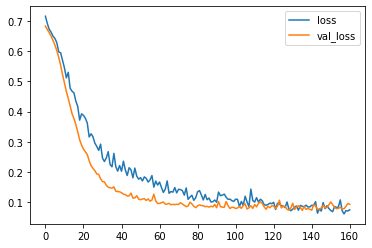

In [41]:
model_loss.plot()

In [52]:
# model.predict_classes(X_test) was removed from tensorflow2.6 .
# Multi-class Classification
# predictions = np.argmax(model.predict(X_test), axis=-1)

# Binary Classification
# predictions = (model.predict(X_test) > 0.5).astype("int32")
# correct one below
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [53]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [56]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
